In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [141]:
data = pd.read_csv(r'C:\Users\Elanu\Desktop\archive\athlete_events.csv')

# DataFrame'i incele

data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
196,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's 500 metres Time Trial,NaN
197,91,Emanuele Abate,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,Ignazio Abate,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN


In [186]:
#columns = ["director", "cast", "country", "date_added", "rating", "duration"]
#selected_columns = data[columns]


from sklearn.model_selection import train_test_split

columns = ["Age", "Weight", "Height"]

for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_border = Q1 - 1.5 * IQR
    upper_border = Q3 + 1.5 * IQR
    outlier_values = selected_columns[(data[column] < lower_border) | (data[column] > upper_border)]
    #outlier_values = data[column].dropna()
    data[column].fillna(~outlier_values.mean(), inplace=True)

X = data.drop("Age", axis=1)
y = data["Age"]

# Veri setini train ve geri kalan veri olarak bölelim
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Geri kalan veri setini validation ve test olarak bölelim
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Değiştirilmiş veri setini kullanmaya devam edin
data.head(300)

#data["Age"].fillna(data["Age"].mean(), inplace=True)
#data["Weight"].fillna(data["Weight"].mean(), inplace=True)
#data["Height"].fillna(data["Height"].mean(), inplace=True)






,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,159,Reem Wa'il Abdalazem Abdalazem El-Bossaty,F,15.0,167.00000,60.000000,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Duet
296,159,Reem Wa'il Abdalazem Abdalazem El-Bossaty,F,15.0,167.00000,60.000000,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Synchronized Swimming,Synchronized Swimming Women's Team
297,159,Reem Wa'il Abdalazem Abdalazem El-Bossaty,F,19.0,167.00000,60.000000,Egypt,EGY,2012 Summer,2012,Summer,London,Synchronized Swimming,Synchronized Swimming Women's Team
298,160,Ali Abdalla Afringi,M,25.0,163.00000,57.000000,Eritrea,ERI,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 5,000 metres"


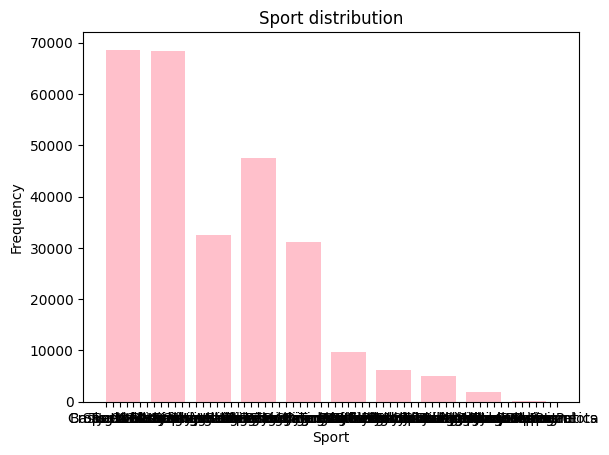

In [213]:

# Yaş verisinin histogramını çizdirme
plt.hist(data["Sport"], bins=10, color="pink", width = 5)
plt.xlabel("Sport")
plt.ylabel("Frequency")
plt.title("Sport distribution")
plt.show()


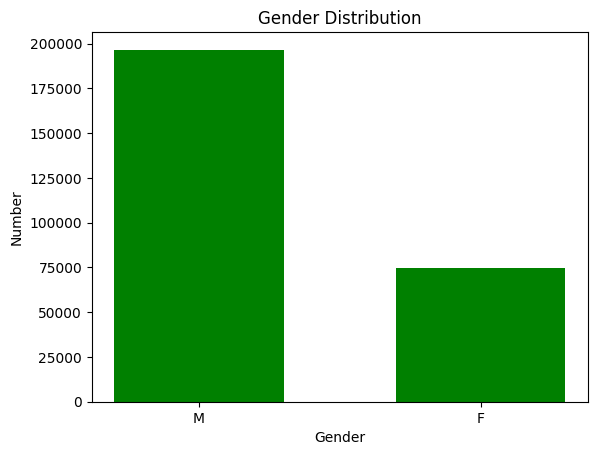

In [204]:


# Cinsiyet dağılımını gösteren çubuk grafik
gender_counts = data["Sex"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color="green", width = 0.6) 
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Gender Distribution")
plt.show()


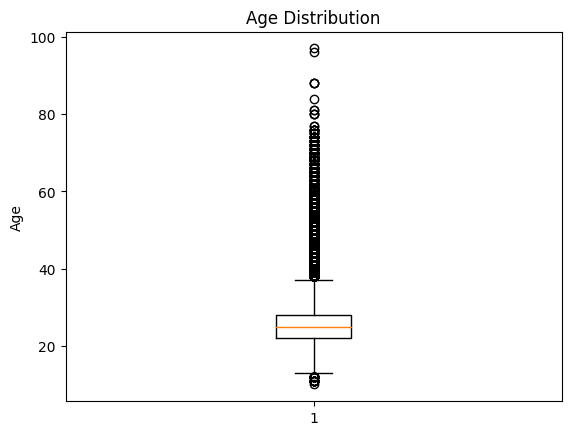

In [216]:


# Yaş verisinin kutu grafiğini çizdirme
plt.boxplot(data["Age"])
plt.ylabel("Age")
plt.title("Age Distribution")
plt.show()
